<a href="https://colab.research.google.com/github/KamoTaueatsoala/ML-Projects/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**My First ML project**



#**Load data**

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


#**Data preparation**


##Data separation as X and Y


In [ ]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data splitting


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


#Model Building


## Linear regression



**Training the model**


In [ ]:
#Training the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) #We want to train the empty linear regression modelon the following dataset
LinearRegression()
#Applying the modek to make predictions
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

#prediction for the train dataset




**Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

print('lr_train_mse ',lr_train_mse)
print('lr_train_r2 ',lr_train_r2)
print('lr_test_mse ',lr_test_mse)
print('lr_test_r2 ',lr_test_r2)

lr_train_mse  1.0075362951093687
lr_train_r2  0.7645051774663391
lr_test_mse  1.0206953660861033
lr_test_r2  0.7891616188563282


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results
#

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162


## **Random Forest**


### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)
RandomForestRegressor(max_depth=2, random_state=100)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

print('rf_train_mse ',rf_train_mse)
print('rf_train_r2 ',rf_train_r2)
print('rf_test_mse ',rf_test_mse)
print('rf_test_r2 ',rf_test_r2)

rf_train_mse  1.028227802112806
rf_train_r2  0.7596688824431413
rf_test_mse  1.407688264904896
rf_test_r2  0.7092230211002489


In [ ]:
rf_results = pd.DataFrame(['Random forest',rf_train_mse, rf_train_r2, rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,1.028228,0.759669,1.407688,0.709223


## **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis= 0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
0,Random forest,1.028228,0.759669,1.407688,0.709223


In [ ]:
df_models.reset_index(drop=True)


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random forest,1.028228,0.759669,1.407688,0.709223


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental logS')

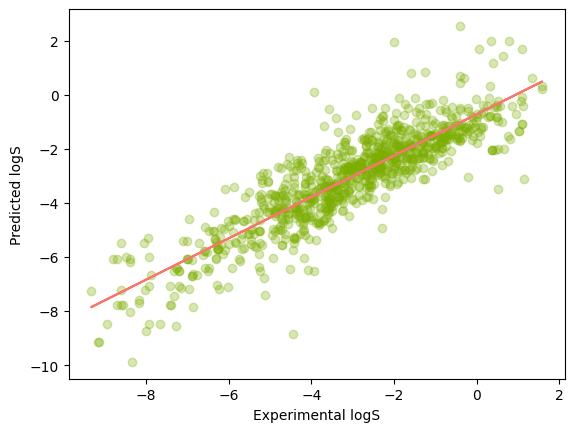

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00",alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted logS')
plt.xlabel('Experimental logS')